<a href="https://colab.research.google.com/github/fm-yodai/kaggle-training/blob/main/titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<a target="_blank" href="https://colab.research.google.com/github/fm-yodai/kaggle-training.git">
  <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
</a>

<h3>下準備</h3>
<ul>
<li>Google Driveのマウント</li>
<li>KaggleのAPIを使うための準備</li>
</ul>

**Google Driveのマウント**

google driveの「マイドライブ」直下に「kaggle」フォルダを作っておく

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


**KaggleのAPIを使うための準備**

1. [kaggle](https://www.kaggle.com/)にサインインし、右上のアイコン→Accountの順にクリック
2. APIのところにある「Create New API Token」をクリック（kaggle.json）がダウンロードされる
3. kaggle.jsonをGoogle Driveの「マイドライブ」直下の「kaggle」フォルダに置く
4. 下記セルを実行（Kaggle APIは、.kaggle/kaggle.jsonのusernameとkeyを見に行ってくれるっぽい）

In [2]:
!pip install -q kaggle
!mkdir -p ~/.kaggle
!cp /content/drive/MyDrive/kaggle/kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

<h3>データのダウンロード</h3>
<ul>
<li>KaggleのAPIを使ってデータをダウンロード</li>
<li>ダウンロードしたデータを解凍</li>
</ul>

**KaggleのAPIを使ってデータをダウンロード**

In [3]:
!kaggle competitions download -c titanic

401 - Unauthorized


**ダウンロードしたデータを解凍**

In [4]:
!unzip titanic.zip -d /content/drive/MyDrive/kaggle/titanic/data

unzip:  cannot find or open titanic.zip, titanic.zip.zip or titanic.zip.ZIP.


<h3>データの読み込み</h3>
<ul>
<li>データを読み込む</li>
<li>データの確認</li>
</ul>

**データを読み込む**

の前に色々import

In [5]:
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.svm import LinearSVC
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [6]:
train = pd.read_csv('/content/drive/MyDrive/kaggle/titanic/data/train.csv')
test = pd.read_csv('/content/drive/MyDrive/kaggle/titanic/data/test.csv')

**データの確認**

In [7]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [8]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


Pclass: 客室等級
SibSp: 兄弟・配偶者数
Parch: 親・子数
Cabin: 最終所在場所
Embarked: 乗船港

<h3>データ可視化</h3>
<ul>
<li>データの特徴把握</li>
<li>グラフでも見てみる</li>
</ul>

**データの特徴把握**

In [9]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [10]:
train['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [11]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


**グラフでも見てみる**

<Axes: xlabel='Pclass', ylabel='count'>

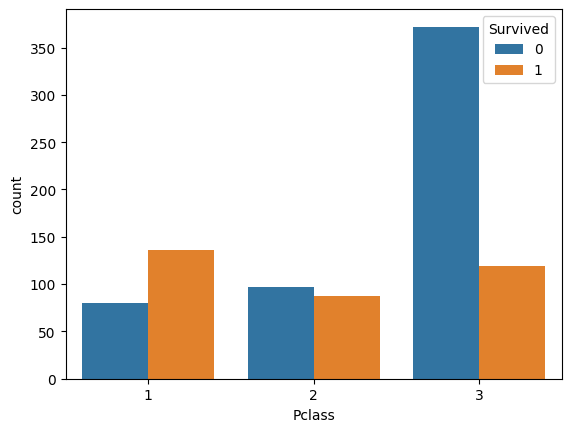

In [12]:
# 客室等級と生存者の関係
sns.countplot(x='Pclass', hue='Survived', data=train)

<Axes: xlabel='Embarked', ylabel='count'>

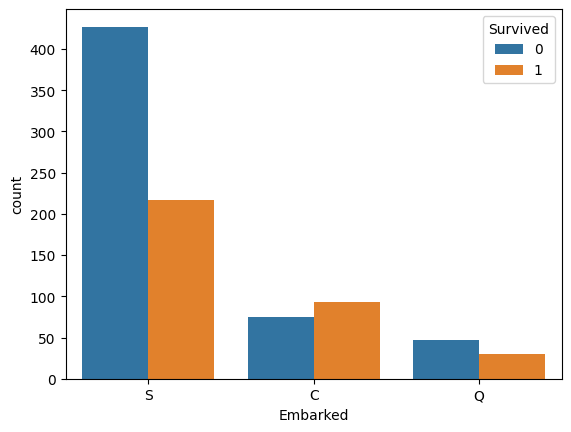

In [13]:
# 乗船港と生存者
sns.countplot(x='Embarked', hue='Survived', data=train)

<Axes: xlabel='Age', ylabel='count'>

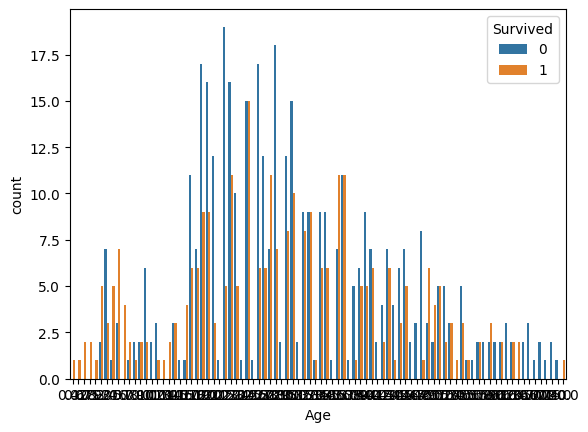

In [14]:
# 年齢と生存者
sns.countplot(x='Age', hue='Survived', data=train)

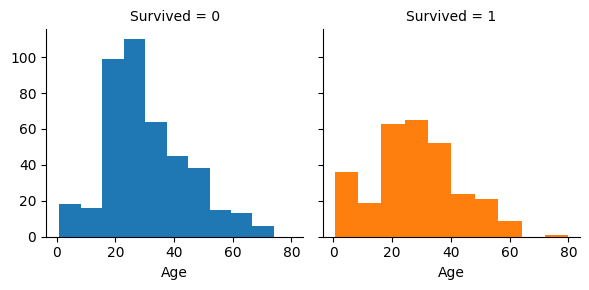

In [15]:
grid = sns.FacetGrid(train, col='Survived', hue='Survived')
grid.map(plt.hist, 'Age')

In [16]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


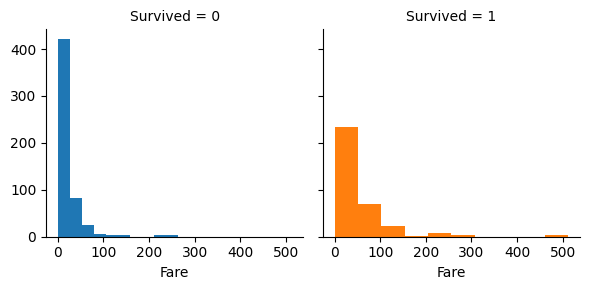

In [17]:
# 運賃と生存者
grid = sns.FacetGrid(train, col='Survived', hue='Survived')
grid.map(plt.hist, 'Fare')

<h3>データの前処理</h3>
<ul>
<li>欠損値の補完</li>
<li>カテゴリ変数の処理</li>
<li>特徴量の選択</li>
<li>(標準化/正規化)</li>
</ul>

**欠損値の補完**

In [18]:
train['Age'] = train['Age'].fillna(train['Age'].median())
train['Embarked'] = train['Embarked'].fillna('S')
test['Age'] = test['Age'].fillna(test['Age'].median())
test['Fare'] = test['Fare'].fillna(test['Fare'].median())

**カテゴリ変数の処理**

In [19]:
train['Sex'] = train['Sex'].map({'female': 0, 'male': 1}).astype(int)
train['Embarked'] = train['Embarked'].map({'S': 0, 'C': 1, 'Q': 2}).astype(int)
test['Sex'] = test['Sex'].map({'female': 0, 'male': 1}).astype(int)
test['Embarked'] = test['Embarked'].map({'S': 0, 'C': 1, 'Q': 2}).astype(int)

**特徴量の選択**

In [20]:
# trainデータを学習データと検証データに分割
X_train, X_test, y_train, y_test = train_test_split(train.drop('Survived', axis=1), train['Survived'], test_size=0.2, random_state=0)
features = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']
X_train = X_train[features]
X_test = X_test[features]

**標準化/正規化**

一旦やんない

<h3>モデルの学習</h3>
<ul>
<li>モデルの定義</li>
<li>モデルの学習</li>
</ul>

**モデルの定義**

In [21]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=1)

**モデルの学習**

In [23]:
# ロジスティック回帰
clf = LogisticRegression(solver='lbfgs')
model = clf.fit(X_train, y_train)

/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.7949438202247191

<h3>モデルの評価</h3>

In [24]:
print('train score: ', model.score(X_train, y_train))
print('test score: ', model.score(X_test, y_test))

train score:  0.7949438202247191
test score:  0.8212290502793296


<h3>予測</h3>
<ul>
<li>予測</li>
</ul>

**予測**

In [26]:
predictions = model.predict(test[features])

[0 0 0 0 1 0 1 0 1 0 0 0 1 0 1 1 0 0 1 0 0 0 1 1 1 0 1 0 0 0 0 0 0 1 0 0 1
 1 0 0 0 1 0 1 1 0 0 0 1 1 0 0 1 1 0 0 0 0 0 1 0 0 0 1 1 1 1 0 1 1 1 0 1 1
 1 1 0 1 0 1 0 0 0 0 0 0 1 1 1 0 1 0 1 0 1 0 1 0 1 0 1 0 0 0 1 0 0 0 0 0 0
 1 1 1 1 0 0 1 0 1 1 0 1 0 0 1 0 1 0 0 0 0 1 0 0 0 0 0 1 0 0 1 0 0 0 0 1 0
 1 0 1 0 0 1 0 0 1 1 0 1 1 0 1 0 0 1 0 0 1 1 0 0 0 0 0 1 1 0 1 1 0 0 1 0 1
 0 1 0 0 0 0 1 0 0 0 0 1 1 0 1 1 0 0 1 0 1 1 0 1 0 0 0 0 0 0 0 1 0 1 0 1 0
 1 0 1 1 0 1 0 0 0 1 0 0 0 0 0 0 1 1 1 1 0 0 0 0 1 0 1 1 1 0 1 0 0 0 0 0 1
 0 0 0 1 1 0 0 1 0 1 0 0 0 1 1 0 1 0 0 0 0 1 0 1 1 1 0 0 0 0 0 1 1 0 0 0 0
 1 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 1 0 1 0 0 0 1 0 0
 1 0 0 0 0 0 0 0 0 0 1 0 1 0 1 0 1 1 0 0 0 1 0 1 0 0 1 0 1 1 0 1 0 0 1 1 0
 0 1 0 0 1 1 0 0 0 0 0 0 1 1 0 1 0 0 0 0 1 1 0 0 0 1 0 1 0 0 1 0 1 1 0 0 0
 0 1 1 1 1 1 0 1 0 0 0]


<h3>提出</h3>
<ul>
<li>提出用ファイルの作成</li>
<li>提出</li>
</ul>

**提出用ファイルの作成**

In [27]:
output = pd.DataFrame({'PassengerId': test.PassengerId, 'Survived': predictions})
output.to_csv('/content/drive/MyDrive/kaggle/titanic/my_submission.csv', index=False)

**提出**

In [28]:
!kaggle competitions submit -c titanic -f /content/drive/MyDrive/kaggle/titanic/my_submission.csv -m "First submission"

401 - Unauthorized


<h3>参考</h3>
<ul>
<li><a href="https://www.kaggle.com/c/titanic">Titanic: Machine Learning from Disaster</a></li>
<li><a href="https://www.kaggle.com/alexisbcook/titanic-tutorial">Titanic Tutorial</a></li>
</ul>

[1]: https://www.kaggle.com/c/titanic
[2]: https://www.kaggle.com/alexisbcook/titanic-tutorial